# Random Search Tutorial

This tutorial demonstrates how to use the `iohgnbg` package to perform random search on GNBG problem instances and integrate the results into `iohinspector` for visualization and analysis.

## Step 1: Import Necessary Libraries
We start by importing the required libraries, including `iohgnbg` for GNBG problem handling, `ioh` for optimization problem definitions, and `numpy` for numerical operations.

In [1]:
# Import necessary libraries
import iohgnbg
import ioh
import numpy as np
import os

## Step 2: Load Problem Instances
Use the `get_problems` function to load multiple problem instances or `get_problem` to load a specific instance. Specify the folder containing the problem files and the indices of the problems to load.

In [2]:
# Load all problem instances with the specified indices from the folder
problems = iohgnbg.get_problems(problem_indices=24)

# Iterate through the loaded problems and print their metadata names
for i, problem in enumerate(problems):
    print(f"Problem {i}: {problem.meta_data.name}")

Problem 0: GNBG_GECCO_2025_f1
Problem 1: GNBG_GECCO_2025_f2
Problem 2: GNBG_GECCO_2025_f3
Problem 3: GNBG_GECCO_2025_f4
Problem 4: GNBG_GECCO_2025_f5
Problem 5: GNBG_GECCO_2025_f6
Problem 6: GNBG_GECCO_2025_f7
Problem 7: GNBG_GECCO_2025_f8
Problem 8: GNBG_GECCO_2025_f9
Problem 9: GNBG_GECCO_2025_f10
Problem 10: GNBG_GECCO_2025_f11
Problem 11: GNBG_GECCO_2025_f12
Problem 12: GNBG_GECCO_2025_f13
Problem 13: GNBG_GECCO_2025_f14
Problem 14: GNBG_GECCO_2025_f15
Problem 15: GNBG_GECCO_2025_f16
Problem 16: GNBG_GECCO_2025_f17
Problem 17: GNBG_GECCO_2025_f18
Problem 18: GNBG_GECCO_2025_f19
Problem 19: GNBG_GECCO_2025_f20
Problem 20: GNBG_GECCO_2025_f21
Problem 21: GNBG_GECCO_2025_f22
Problem 22: GNBG_GECCO_2025_f23
Problem 23: GNBG_GECCO_2025_f24


## Step 3: Choose a Problem Instance
Select a specific problem instance using the `get_problem` function. Specify the folder path and the index of the problem to load.

In [4]:
# Choose a specific problem instance
problem_index = 1  # Specify the problem index to load
gnbg_problem = iohgnbg.get_problem(problem_index=problem_index)
print(f"Selected Problem: {gnbg_problem.meta_data.name}")

Selected Problem: GNBG_GECCO_2025_f1


## Step 4: Define a Random Search Algorithm
Implement a simple random search algorithm that evaluates the problem multiple times with randomly generated solutions within the problem's bounds.

In [5]:
# Define a simple random search algorithm
class RandomSearch:
    def __init__(self, budget: int):
        self.budget = budget

    def __call__(self, problem: ioh.problem.RealSingleObjective):
        for _ in range(self.budget):
            x = np.random.uniform(problem.bounds.lb, problem.bounds.ub)
            problem(x)

## Step 5: Set Up a Logger
Create an `ioh.logger.Analyzer` to store the results of the random search. Specify the root directory, folder name, and algorithm name for the logger.

In [6]:
# Set up a logger to store results
logger = ioh.logger.Analyzer(
    root=os.getcwd(),
    folder_name="RandomSearch_Test",
    algorithm_name="RandomSearch"
)

## Step 6: Run the Random Search
Attach the logger to the problem, execute the random search algorithm, and reset the problem after the run to prepare it for future evaluations.

In [7]:
# Attach the logger and run the random search
RS = RandomSearch(budget=10000)
gnbg_problem.attach_logger(logger)
RS(gnbg_problem)
gnbg_problem.reset()

/tmp/ipykernel_178069/2634815050.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  problem(x)


## Step 7: Close the Logger
Ensure the logger is properly closed after the random search is complete to save the results and release resources.

In [8]:
# Close the logger after the run
logger.close()

## Step 8: Integrate with `iohinspector`
Use `iohinspector` to load and visualize the results of the random search.

In [9]:
!pip install iohinspector

/home/dinu/miniconda3/envs/iohgnbg/lib/python3.10/site-packages/iohinspector/align.py:109: UserWarning: Sortedness of columns cannot be checked when 'by' groups provided
  result_df = x_vals.join_asof(


,evaluations,algorithm_name,data_id,algorithm_info,suite,function_name,function_id,dimension,instance,run_id,evals,best_y,raw_y,eaf
0,1,RandomSearch,1.0,None,None,None,1.0,30.0,0.0,1.0,10000.0,58457.456752,143617.267110,0.177675
1,2,RandomSearch,1.0,None,None,None,1.0,30.0,0.0,1.0,10000.0,58457.456752,143617.267110,0.177675
2,3,RandomSearch,1.0,None,None,None,1.0,30.0,0.0,1.0,10000.0,58457.456752,143617.267110,0.177675
3,4,RandomSearch,1.0,None,None,None,1.0,30.0,0.0,1.0,10000.0,58457.456752,143617.267110,0.177675
4,5,RandomSearch,1.0,None,None,None,1.0,30.0,0.0,1.0,10000.0,58457.456752,143617.267110,0.177675
5,6,RandomSearch,1.0,None,None,None,1.0,30.0,0.0,1.0,10000.0,58457.456752,143617.267110,0.177675
6,7,RandomSearch,1.0,None,None,None,1.0,30.0,0.0,1.0,10000.0,58457.456752,143617.267110,0.177675
7,9,RandomSearch,1.0,None,None,None,1.0,30.0,0.0,1.0,10000.0,58457.456752,143617.267110,0.177675
8,11,RandomSearch,1.0,None,None,None,1.0,30.0,0.0,1.0,10000.0,58457.456752,143617.267110,0.177675
9,13,RandomSearch,1.0,None,None,None,1.0,30.0,0.0,1.0,10000.0,58457.456752,143617.267110,0.177675


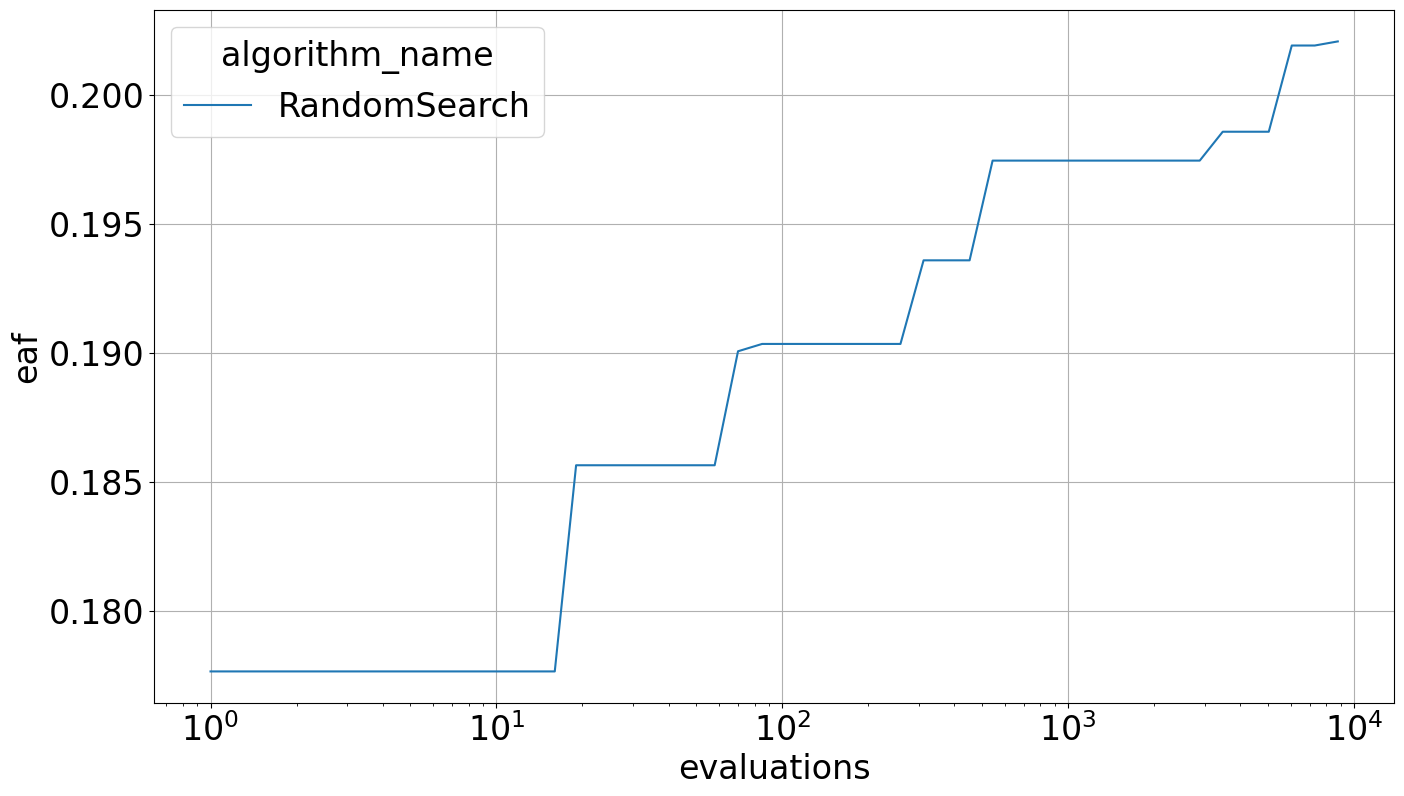

In [11]:
from iohinspector import DataManager, plot_ecdf

# Create a data manager
manager = DataManager()
data_folders = ["RandomSearch_Test"]
manager.add_folders(data_folders)

# Select and load data
selection = manager.select(function_ids=[problem_index], algorithms=["RandomSearch"])
df = selection.load(monotonic=True, include_meta_data=True)

# Visualize results
plot_ecdf(df)